In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

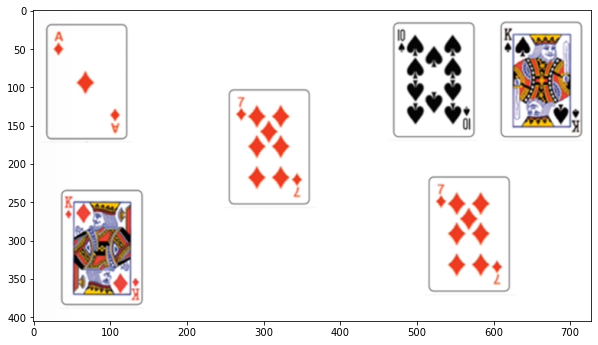

In [2]:
image_base = cv2.imread('baseCartas.png')
image_base = cv2.cvtColor(image_base, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_base, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (10,10))
plt.imshow(image_base); plt.show();

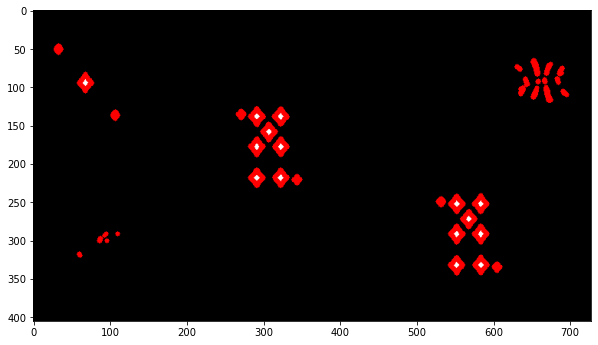

In [3]:
img_hsv = cv2.cvtColor(image_base, cv2.COLOR_BGR2HSV)

image_lower = np.array([110, 210, 150])  
image_upper = np.array([255, 255, 255])
mask_hsv = cv2.inRange(img_hsv, image_lower, image_upper)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"
cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);
plt.figure(figsize = (10,10))  
plt.imshow(contornos_img);

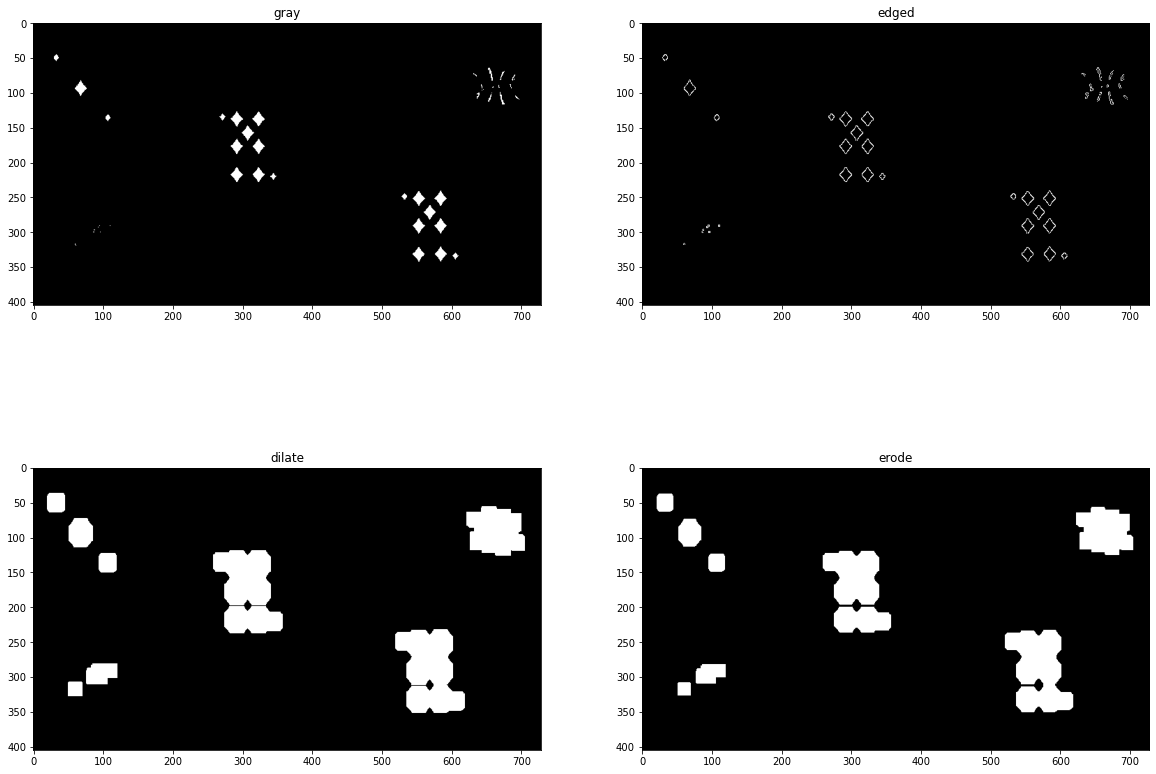

In [4]:
#uma solução possivel...
#carregamos a imagem, convertemos para níveis de cinza e a borramos levemente
quadradoSeparado = cv2.cvtColor(mask_hsv, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(quadradoSeparado, cv2.COLOR_BGR2GRAY)

#calculamos as arestas e realizamos uma dilatação + erosão para fechar
#eventuais gaps entre as arestas dos objetos
edged = cv2.Canny(gray, 50, 150)
dilate = cv2.dilate(edged, None, iterations=9)
erode = cv2.erode(dilate, None, iterations=1)

plt.figure(figsize = (20,15))
plt.subplot(2, 2, 1), plt.imshow(gray, 'gray'), plt.title('gray')
plt.subplot(2, 2, 2), plt.imshow(edged, 'gray'), plt.title('edged')
plt.subplot(2, 2, 3), plt.imshow(dilate, 'gray'), plt.title('dilate')
plt.subplot(2, 2, 4), plt.imshow(erode, 'gray'), plt.title('erode')
plt.show();


In [5]:
cnts, _ = cv2.findContours(erode.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

(cnts, boundingBoxes) = zip(*sorted(zip(cnts, [cv2.boundingRect(c) for c in cnts]), key=lambda b: b[1][0], reverse=False))

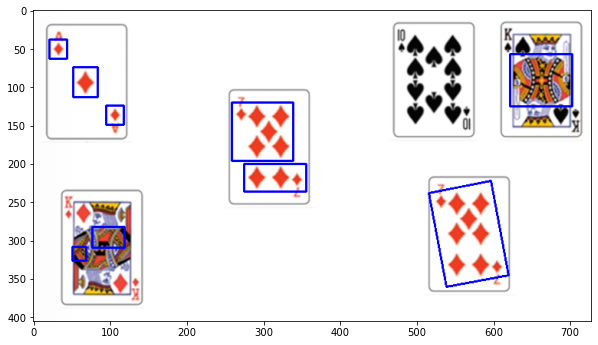

In [6]:

orig = image_base.copy()

#Percorre todos os contornos
for c in cnts:
    
    
    
  # se o contorno não é suficientemente grande, ignorá-lo
    if cv2.contourArea(c) > 5:
        box = cv2.minAreaRect(c)
        box = cv2.boxPoints(box) 
        box = np.array(box, dtype="int")

        cv2.drawContours(orig, [box.astype("int")], -1, (0, 0, 255), 2)


  # calcula a bounding box rotacionada do contorno

plt.figure(figsize = (10,10))
plt.imshow(orig); plt.show();


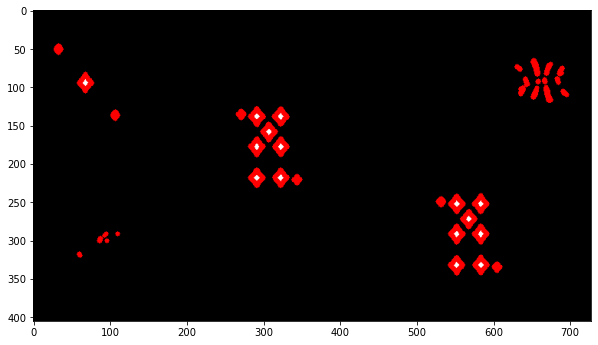

In [7]:
img_hsv = cv2.cvtColor(orig, cv2.COLOR_BGR2HSV)

image_lower = np.array([110, 210, 150])  
image_upper = np.array([255, 255, 255])
mask_hsv = cv2.inRange(img_hsv, image_lower, image_upper)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"
cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);
plt.figure(figsize = (10,10))  
plt.imshow(contornos_img);

In [8]:
import cv2
import numpy as np
cap = cv2.VideoCapture("q2.mp4")

w = 1000
h = 600

while True:
    ret, frame = cap.read()

    if not ret:
        break
    
    frame1 = cv2.resize(frame, (w, h))
    
    img_hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)

    orig = frame1.copy()
    
    # parte do vermelho
    image_lower_Vermelha = np.array([0, 150, 50])  
    image_upper_Vermelha = np.array([255, 255, 255])
    mask_hsvVermelha = cv2.inRange(img_hsv, image_lower_Vermelha, image_upper_Vermelha)
    
    CartaSeparadoVermelha = cv2.cvtColor(mask_hsvVermelha, cv2.COLOR_BGR2RGB)
    grayVermelha = cv2.cvtColor(CartaSeparadoVermelha, cv2.COLOR_BGR2GRAY)

  
    edgedVermelha = cv2.Canny(grayVermelha, 50, 150)
    dilateVermelha = cv2.dilate(edgedVermelha, None, iterations=22)
    erodeVermelha = cv2.erode(dilateVermelha, None, iterations=2)
    
    cntsVermelha, _ = cv2.findContours(erodeVermelha.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    (cntsVermelha, boundingBoxes) = zip(*sorted(zip(cntsVermelha, [cv2.boundingRect(c) for c in cntsVermelha]), key=lambda b: b[1][0], reverse=False))
    
    numeroCartaVermelha = 0
    
    for c in cntsVermelha:
  # se o contorno não é suficientemente grande, ignorá-lo
        if cv2.contourArea(c) > 10000:
            area = cv2.contourArea(c)
            
                
            boxVermelha = cv2.minAreaRect(c)
            boxVermelha = cv2.boxPoints(boxVermelha) 
            boxVermelha = np.array(boxVermelha, dtype="int")
            
            if area > 24000 and area < 24600:
                continue
            else:
                cv2.drawContours(orig, [boxVermelha.astype("int")], -3, (0, 255, 0), 2)
                numeroCartaVermelha = numeroCartaVermelha + 1

    # Exibe resultado
   
    origem_areaPreta = (350,570)
    font_area = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(orig, str("Cartas vermelhas: {}").format(numeroCartaVermelha), origem_areaPreta, font_area,1,(20, 184, 184),2,cv2.LINE_AA)

    cv2.imshow("Feed", orig)
    
    

    # Wait for key 'ESC' to quit
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break

# That's how you exit
cap.release()
cv2.destroyAllWindows()